In [0]:
!git clone https://github.com/spMohanty/PlantVillage-Dataset

Cloning into 'PlantVillage-Dataset'...
remote: Enumerating objects: 163229, done.
remote: Total 163229 (delta 0), reused 0 (delta 0), pack-reused 163229
Receiving objects: 100% (163229/163229), 2.00 GiB | 38.89 MiB/s, done.
Resolving deltas: 100% (99/99), done.
Checking out files: 100% (182401/182401), done.


In [0]:
!ls PlantVillage-Dataset/raw/color

 Apple___Apple_scab
 Apple___Black_rot
 Apple___Cedar_apple_rust
 Apple___healthy
 Blueberry___healthy
'Cherry_(including_sour)___healthy'
'Cherry_(including_sour)___Powdery_mildew'
'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
'Corn_(maize)___Common_rust_'
'Corn_(maize)___healthy'
'Corn_(maize)___Northern_Leaf_Blight'
 Grape___Black_rot
'Grape___Esca_(Black_Measles)'
 Grape___healthy
'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
'Orange___Haunglongbing_(Citrus_greening)'
 Peach___Bacterial_spot
 Peach___healthy
 Pepper,_bell___Bacterial_spot
 Pepper,_bell___healthy
 Potato___Early_blight
 Potato___healthy
 Potato___Late_blight
 Raspberry___healthy
 Soybean___healthy
 Squash___Powdery_mildew
 Strawberry___healthy
 Strawberry___Leaf_scorch
 Tomato___Bacterial_spot
 Tomato___Early_blight
 Tomato___healthy
 Tomato___Late_blight
 Tomato___Leaf_Mold
 Tomato___Septoria_leaf_spot
'Tomato___Spider_mites Two-spotted_spider_mite'
 Tomato___Target_Spot
 Tomato___Tomato_mosaic_virus
 Tomato_

In [0]:
import keras
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [0]:
import os
os.listdir('PlantVillage-Dataset/raw/color')

['Peach___healthy',
 'Strawberry___Leaf_scorch',
 'Corn_(maize)___Common_rust_',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Corn_(maize)___healthy',
 'Grape___Esca_(Black_Measles)',
 'Raspberry___healthy',
 'Grape___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Squash___Powdery_mildew',
 'Pepper,_bell___Bacterial_spot',
 'Tomato___Leaf_Mold',
 'Potato___healthy',
 'Potato___Early_blight',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Pepper,_bell___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Apple___Apple_scab',
 'Tomato___Late_blight',
 'Apple___Black_rot',
 'Apple___healthy',
 'Tomato___Target_Spot',
 'Strawberry___healthy',
 'Tomato___Early_blight',
 'Soybean___healthy',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Blueberry___healthy',
 'Peach___Bacterial_spot',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Apple___Cedar_apple

In [0]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_path = 'PlantVillage-Dataset/raw/color'
test_path = "images/test/"
batch_size = 32
image_size = 128
num_class = 38
target_size = (image_size,image_size)

In [0]:
train_datagen = ImageDataGenerator(validation_split = 0.2,
                                           rescale = 1./255
                                           
                                            )
train_generator = train_datagen.flow_from_directory(directory = train_path , batch_size = batch_size,target_size=target_size)
validation_generator = train_datagen.flow_from_directory(directory = train_path , batch_size = batch_size,target_size=target_size)
model = train_datagen.flow_from_directory(directory = train_path , batch_size = batch_size,target_size=target_size)

Found 54305 images belonging to 38 classes.
Found 54305 images belonging to 38 classes.
Found 54305 images belonging to 38 classes.


In [0]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

gray_r = train_path.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
train_path = gray_r.reshape(gray.shape[0],gray.shape[1])

In [0]:

gray_r = train_path.reshape(train_path.shape[0]*train_path.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])

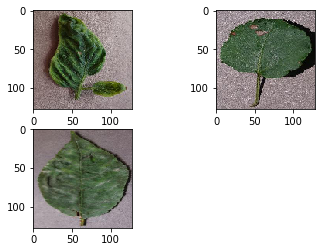

In [0]:
x_batch , _ = train_generator.next()
fig = plt.figure()
column = 2
row = 2
for i in range (1, column*row):
    num = np.random.randint(batch_size)
    image = x_batch[num].astype(np.float)
    fig.add_subplot(row,column,i)
    plt.imshow(image)

In [0]:
p = []
for i in range(38):
    p.append(list(train_generator.labels).count(i))
    print(str(i)+":"+str(p[i]))

0:630
1:621
2:275
3:1645
4:1502
5:1052
6:854
7:513
8:1192
9:985
10:1162
11:1180
12:1383
13:1076
14:423
15:5507
16:2297
17:360
18:997
19:1478
20:1000
21:1000
22:152
23:371
24:5090
25:1835
26:1109
27:456
28:2127
29:1000
30:1909
31:952
32:1771
33:1676
34:1404
35:5357
36:373
37:1591


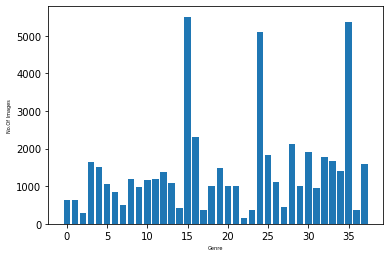

In [0]:
index = p
plt.bar(range(38),index)
plt.xlabel('Genre',fontsize = 5)
plt.ylabel('No.Of Images', fontsize = 5)
plt.show()

In [0]:
for i,j in zip(train_generator.class_indices,p):
    print(i)
    print(j)

Apple___Apple_scab
630
Apple___Black_rot
621
Apple___Cedar_apple_rust
275
Apple___healthy
1645
Blueberry___healthy
1502
Cherry_(including_sour)___Powdery_mildew
1052
Cherry_(including_sour)___healthy
854
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
513
Corn_(maize)___Common_rust_
1192
Corn_(maize)___Northern_Leaf_Blight
985
Corn_(maize)___healthy
1162
Grape___Black_rot
1180
Grape___Esca_(Black_Measles)
1383
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
1076
Grape___healthy
423
Orange___Haunglongbing_(Citrus_greening)
5507
Peach___Bacterial_spot
2297
Peach___healthy
360
Pepper,_bell___Bacterial_spot
997
Pepper,_bell___healthy
1478
Potato___Early_blight
1000
Potato___Late_blight
1000
Potato___healthy
152
Raspberry___healthy
371
Soybean___healthy
5090
Squash___Powdery_mildew
1835
Strawberry___Leaf_scorch
1109
Strawberry___healthy
456
Tomato___Bacterial_spot
2127
Tomato___Early_blight
1000
Tomato___Late_blight
1909
Tomato___Leaf_Mold
952
Tomato___Septoria_leaf_spot
1771
Tomato___Spider_

In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [0]:
import tensorflow.keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D,MaxPooling2D , Dense, Dropout, Activation, Flatten

In [0]:
model=Sequential()
model.add(Conv2D(32,kernel_size=3, input_shape = (128,128,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))


model.add(Conv2D(32,kernel_size=3, input_shape = (128,128,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,kernel_size=3, input_shape = (128,128,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256,kernel_size=3, input_shape = (128,128,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(units=128))
model.add(Activation('relu'))
model.add(Dense(38))
model.add(Activation('softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
x_batch, Y_batch = train_generator.next()

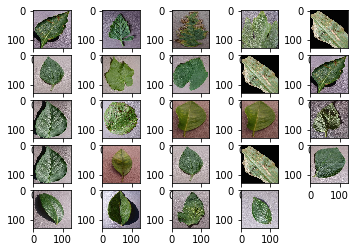

In [0]:
fig = plt.figure()
column = 5 
row = 5
for i in range (1, column*row):
    num = np.random.randint(batch_size)
    image = x_batch[num].astype(np.float)
    fig.add_subplot(row,column,i)
    plt.imshow(image)

In [0]:
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 63, 63, 32)       

In [0]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])


In [0]:
model.fit_generator(
train_generator,
steps_per_epoch = train_generator.samples// batch_size,validation_data = validation_generator, validation_steps = validation_generator.samples// batch_size,epochs=40)




from keras import backend as K
K.tensorflow_backend._get_available_gpus()



model.save('scratch_model.h5')
print("Model Saved")



get_ipython().system('conda install h5py')



model.metrics[1]

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/40





1697/1697 [==============================] - 194s 114ms/step - loss: 1.8451 - acc: 0.4769 - val_loss: 1.0006 - val_acc: 0.6901
Epoch 2/40
1697/1697 [==============================] - 176s 104ms/step - loss: 0.7637 - acc: 0.7580 - val_loss: 0.4614 - val_acc: 0.8525
Epoch 3/40
1697/1697 [==============================] - 177s 105ms/step - loss: 0.4467 - acc: 0.8536 - val_loss: 0.3185 - val_acc: 0.8947
Epoch 4/40
1697/1697 [==============================] - 176s 104ms/step - loss: 0.3160 - acc: 0.8958 - val_loss: 0.1853 - val_acc: 0.9385
Epoch 5/40
1697/1697 [==============================] - 176s 104ms/step - loss: 0.2534 - acc: 0.9167 - val_loss: 0.1920 - val_acc: 0.9348
Epoch 6/40
1697/1697 [==============================] - 176s 104ms/step - loss: 0.2089 - acc: 0.9303 - val_loss: 0.1449 - val_acc: 0.9498
Epoch 7/40
1697/1697 [==============================] - 176s 104ms/ste

In [0]:
model.evaluate(validation_generator)